In [1]:
from aimsgb import grain, grain_bound
from aimsgb.grain_bound import GBInformation

import numpy as np
import matplotlib.pylab as plt

from pymatgen import Structure, Lattice, PeriodicSite
from pyiron import Project 

from pyiron.atomistics.structure.atoms import pyiron_to_pymatgen, pymatgen_to_pyiron

In [2]:
pr = Project('gb')
Al = pyiron_to_pymatgen(pr.create_ase_bulk('Mg', orthorhombic=True))

grain_init = grain.Grain(Al.lattice, Al.species, Al.frac_coords)
# grain_init

/Users/jan/PycharmProjects/pyiron/pyiron/atomistics/structure/atoms.py:3226: UserWarning: Found unknown keys: ['_cellobj']
  warnings.warn("Found unknown keys: " + str(dict_keys))


## Sigma 3

In [3]:
axis = [0,0,1]
gb_info = GBInformation(axis=axis, max_sigma=15)  # [5]['plane']
# np.sort(list(gb_info.keys())), gb_info[3]['plane']
gb_info

{5: {'theta': [53.13010235415598, 36.86989764584402],
  'plane': [[[2, -1, 0], [1, 2, 0], [0, 0, 1]],
   [[3, -1, 0], [1, 3, 0], [0, 0, 1]]],
  'rot_matrix': array([[ 0.8, -0.6,  0. ],
         [ 0.6,  0.8,  0. ],
         [ 0. ,  0. ,  1. ]]),
  'csl': [array([[ 2,  1,  0],
          [-1,  2,  0],
          [ 0,  0,  1]]),
   array([[ 3,  1,  0],
          [-1,  3,  0],
          [ 0,  0,  1]])]},
 13: {'theta': [67.38013505195957, 22.61986494804043],
  'plane': [[[3, -2, 0], [2, 3, 0], [0, 0, 1]],
   [[5, -1, 0], [1, 5, 0], [0, 0, 1]]],
  'rot_matrix': array([[ 0.92307692, -0.38461538,  0.        ],
         [ 0.38461538,  0.92307692,  0.        ],
         [ 0.        ,  0.        ,  1.        ]]),
  'csl': [array([[ 3,  2,  0],
          [-2,  3,  0],
          [ 0,  0,  1]]),
   array([[ 5,  1,  0],
          [-1,  5,  0],
          [ 0,  0,  1]])]}}

In [4]:
# grain_bound.GrainBoundary?

In [5]:
gb_obj = grain_bound.GrainBoundary(axis=[0,0,1], sigma=5, plane=[1,2,0], initial_struct=grain_init)
gb = gb_obj.build_gb(to_primitive=False)

/Users/jan/miniforge3/lib/python3.9/site-packages/aimsgb/grain_bound.py:467: UserWarning: Your input structure is not a conventional standard structure. aimsgb will do the transformation for you.
  warnings.warn("Your input structure is not a conventional standard "


In [6]:
# gb_obj = grain_bound.GrainBoundary(axis=[0,1,2], sigma=5, plane=[0,1,2], initial_struct=grain_init)
# gb = gb_obj.build_gb(to_primitive=False)

In [7]:
grains = pymatgen_to_pyiron(gb).center_coordinates_in_unit_cell()
grains.repeat(2).plot3d(particle_size=3, view_plane=[1,0,0])

NGLWidget()

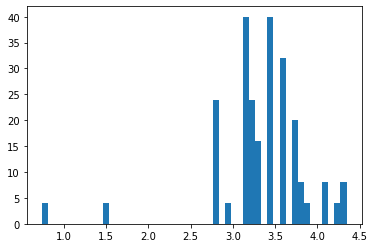

In [8]:
nbrs = grains.get_neighbors()
plt.hist(nbrs.distances.flatten(), bins=50);

In [9]:
ids = nbrs.indices[nbrs.distances<2]
del grains[ids]

In [10]:
grains.center_coordinates_in_unit_cell().plot3d(particle_size=3, show_cell=True)

NGLWidget()

## Sigma 5

In [11]:
axis = [1,2,0]
gb_info = GBInformation(axis=axis, max_sigma=10)  # [5]['plane']
np.sort(list(gb_info.keys())), gb_info[5]['plane']

(array([3, 5, 7, 9]), [[[0, 0, 1], [2, -1, 0], [1, 2, 0]]])

In [12]:
%%time
gb_obj = grain_bound.GrainBoundary(axis=axis, sigma=5, plane=[2, -1, 0], initial_struct=grain_init)
gb = gb_obj.build_gb(to_primitive=False)

CPU times: user 40.1 ms, sys: 4.48 ms, total: 44.6 ms
Wall time: 36.7 ms


/Users/jan/miniforge3/lib/python3.9/site-packages/aimsgb/grain_bound.py:467: UserWarning: Your input structure is not a conventional standard structure. aimsgb will do the transformation for you.
  warnings.warn("Your input structure is not a conventional standard "


In [13]:
# gb_obj = grain_bound.GrainBoundary(axis=[0,1,2], sigma=5, plane=[0,1,2], initial_struct=grain_init)
# gb = gb_obj.build_gb(to_primitive=False)

In [14]:
grains = pymatgen_to_pyiron(gb).center_coordinates_in_unit_cell()
print (len(grains))
grains.plot3d(particle_size=3, view_plane=[1, 0, 0])

20


NGLWidget()

### Convert structure directly 

In [15]:
# a = 4.05
# coords = np.array([[0, 0, 0], [0, 0.5, 0.5], [0.5, 0.5, 0], [0.5, 0, 0.5]])
# lattice = Lattice.cubic(a=a)

# struct = Structure(lattice, 4 * ["Al"], coords) * 2
# struct

# grain_init = grain.Grain(lattice, species= 4 * ["Al"], coords=coords)
# grain_init

In [16]:
# pr = Project('gb')
# ss = gb
# symbols = [s.value for s in ss.species]  
# positions = ss.cart_coords

# grains = pr.create_atoms(symbols, positions, cell=ss.lattice.matrix)

In [17]:
# grains.center_coordinates_in_unit_cell().plot3d(particle_size=3, show_cell=True)